In [1]:
%pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [2]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ----- ---------------------------------- 1.8/12.8 MB 10.1 MB/s eta 0:00:02
     ------------- -------------------------- 4.2/12.8 MB 10.1 MB/s eta 0:00:01
     -------------------- ------------------- 6.6/12.8 MB 10.3 MB/s eta 0:00:01
     --------------------------- ------------ 8.9/12.8 MB 10.7 MB/s eta 0:00:01
     -------------------------------- ------ 10.7/12.8 MB 10.2 MB/s eta 0:00:01
     ------------------------------------- -- 12.1/12.8 MB 9.9 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 MB 8.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [1]:
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer 
import spacy 
language_model = spacy.load("en_core_web_sm") 
import matplotlib.pyplot as plt 

import numpy as np


In [4]:
mich=pd.read_csv("umich.csv")

In [5]:
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \r\nMatter \r\nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [6]:
def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [8]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [10]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [11]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [12]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [13]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [14]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

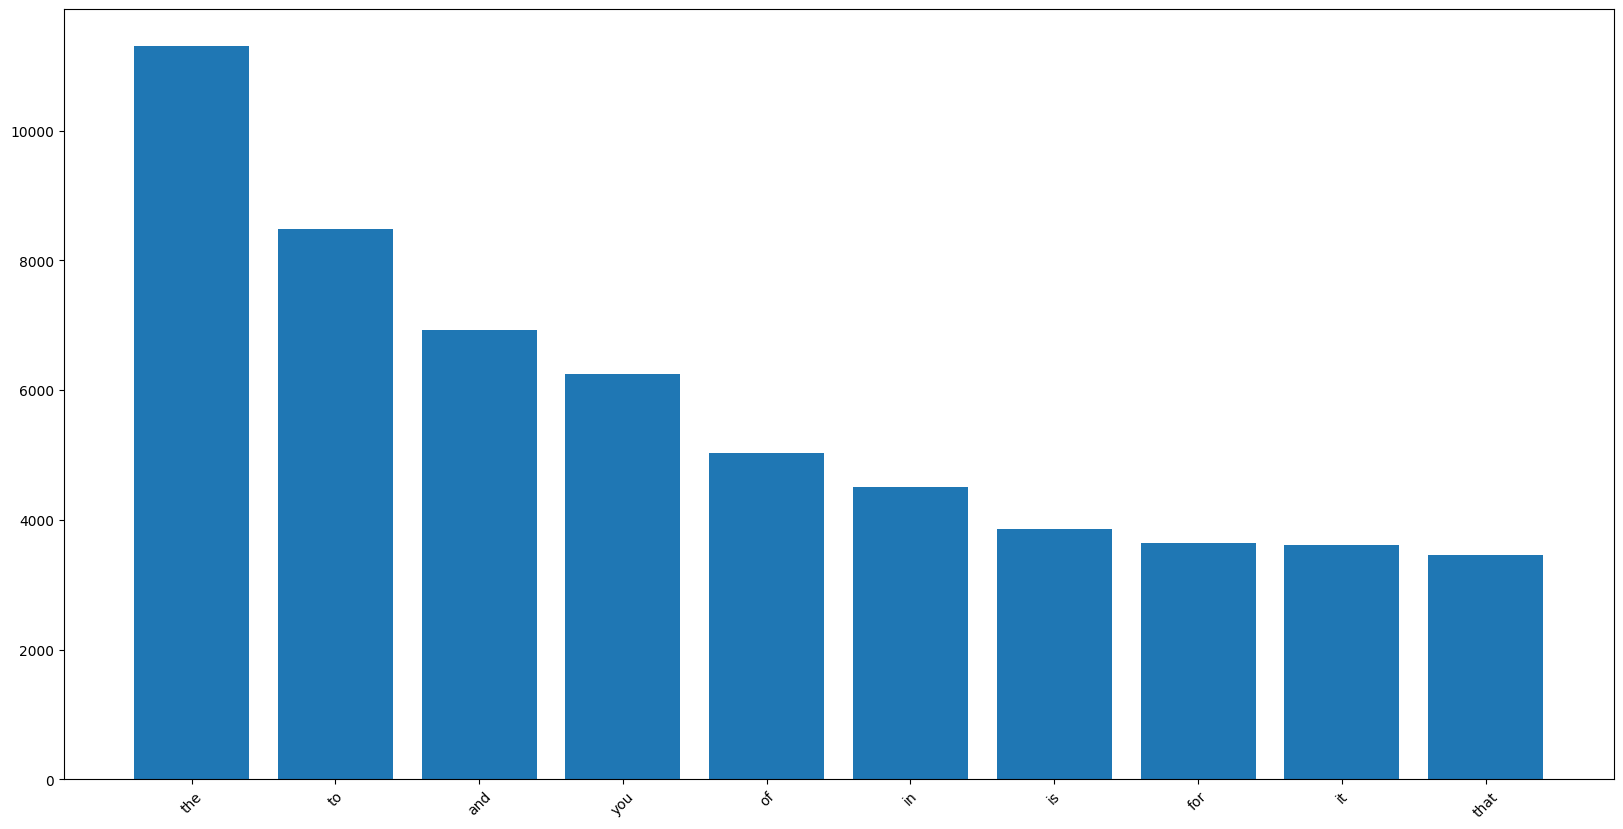

In [16]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

In [ ]:
"The words in the plot above are common words that do not tell us much because they are non-descriptive words and are used very often. As such, they are not very useful for studying the community"

In [17]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [19]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [20]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [21]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8637 sparse matrix of type '<class 'numpy.int64'>'
	with 126833 stored elements in Compressed Sparse Row format>

In [22]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not               2862
student           1183
like              1183
people            1124
class              988
                  ... 
sell minnesota       3
cred                 3
credential           3
sell oregon          3
pay dollar           3
Length: 8637, dtype: int64

In [23]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

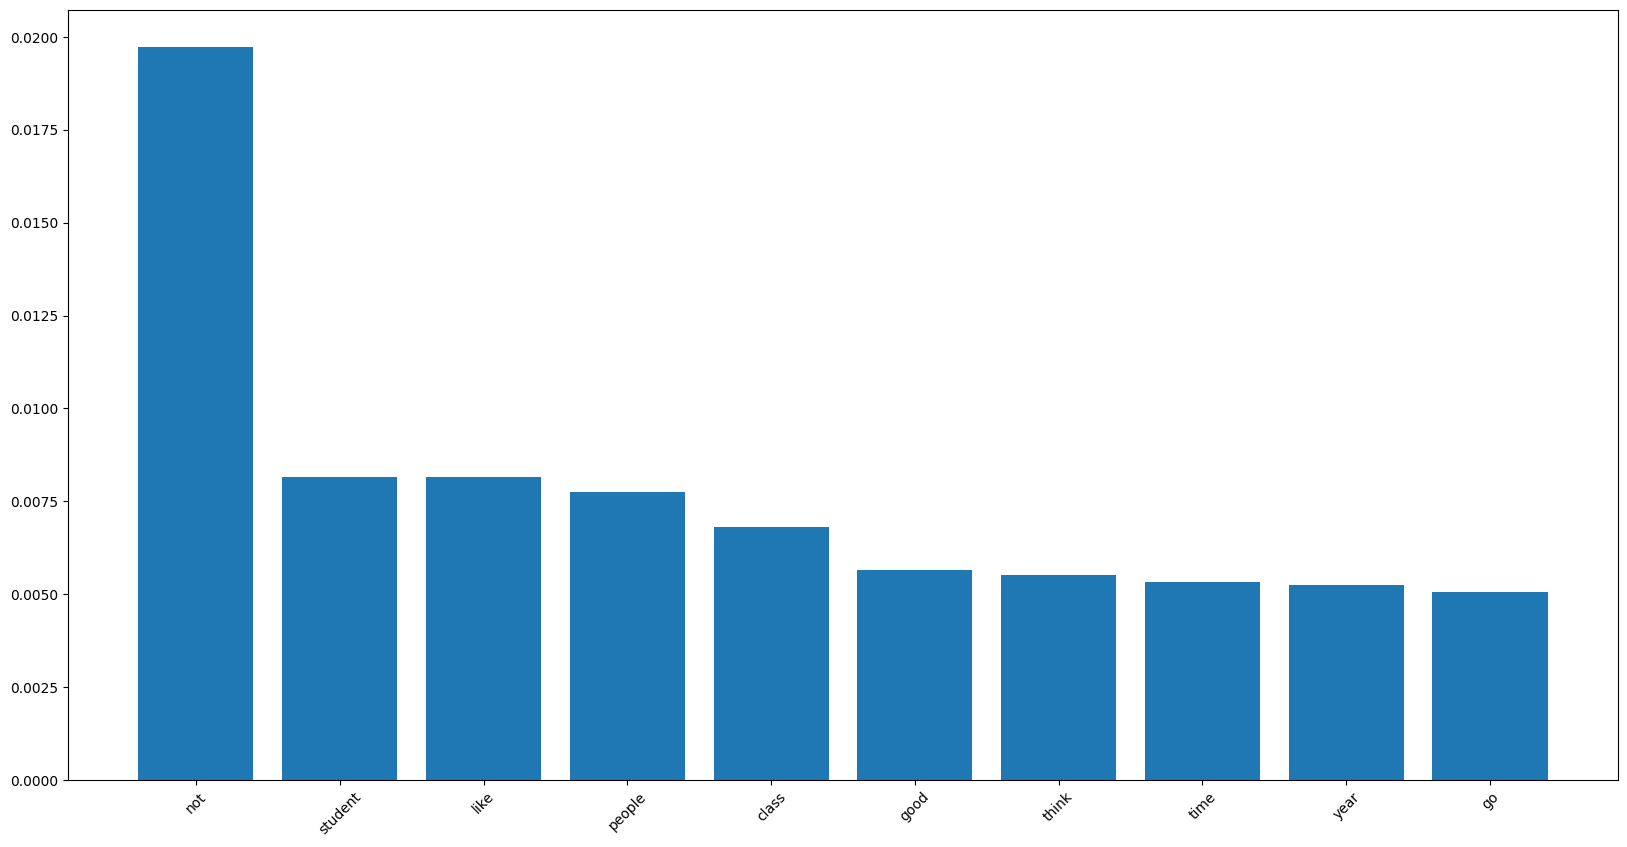

In [24]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [25]:
#pandas allows us to access specific words in the series using the index
word_counts["student loan"]

4.138501862325838e-05

In [26]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000034
cs                  0.001228
computer            0.000262
dtype: float64

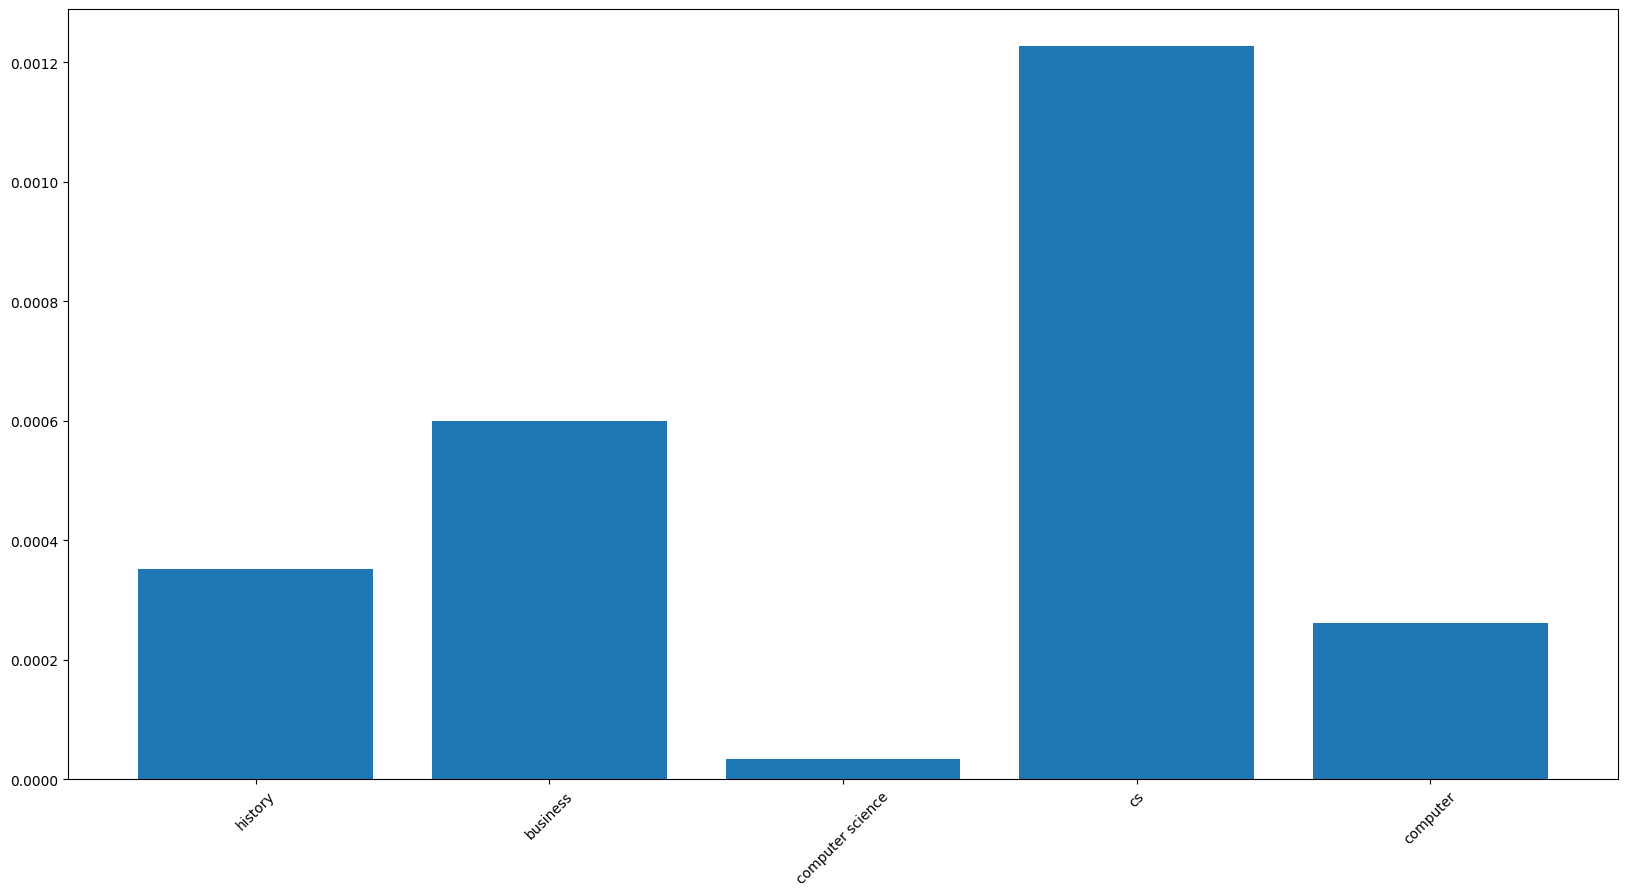

In [27]:
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [29]:
plot_list=word_counts[["football", "weather", "campus life", "information science", "money"]]
plot_list

football               0.000276
weather                0.000297
campus life            0.000021
information science    0.000028
money                  0.001200
dtype: float64

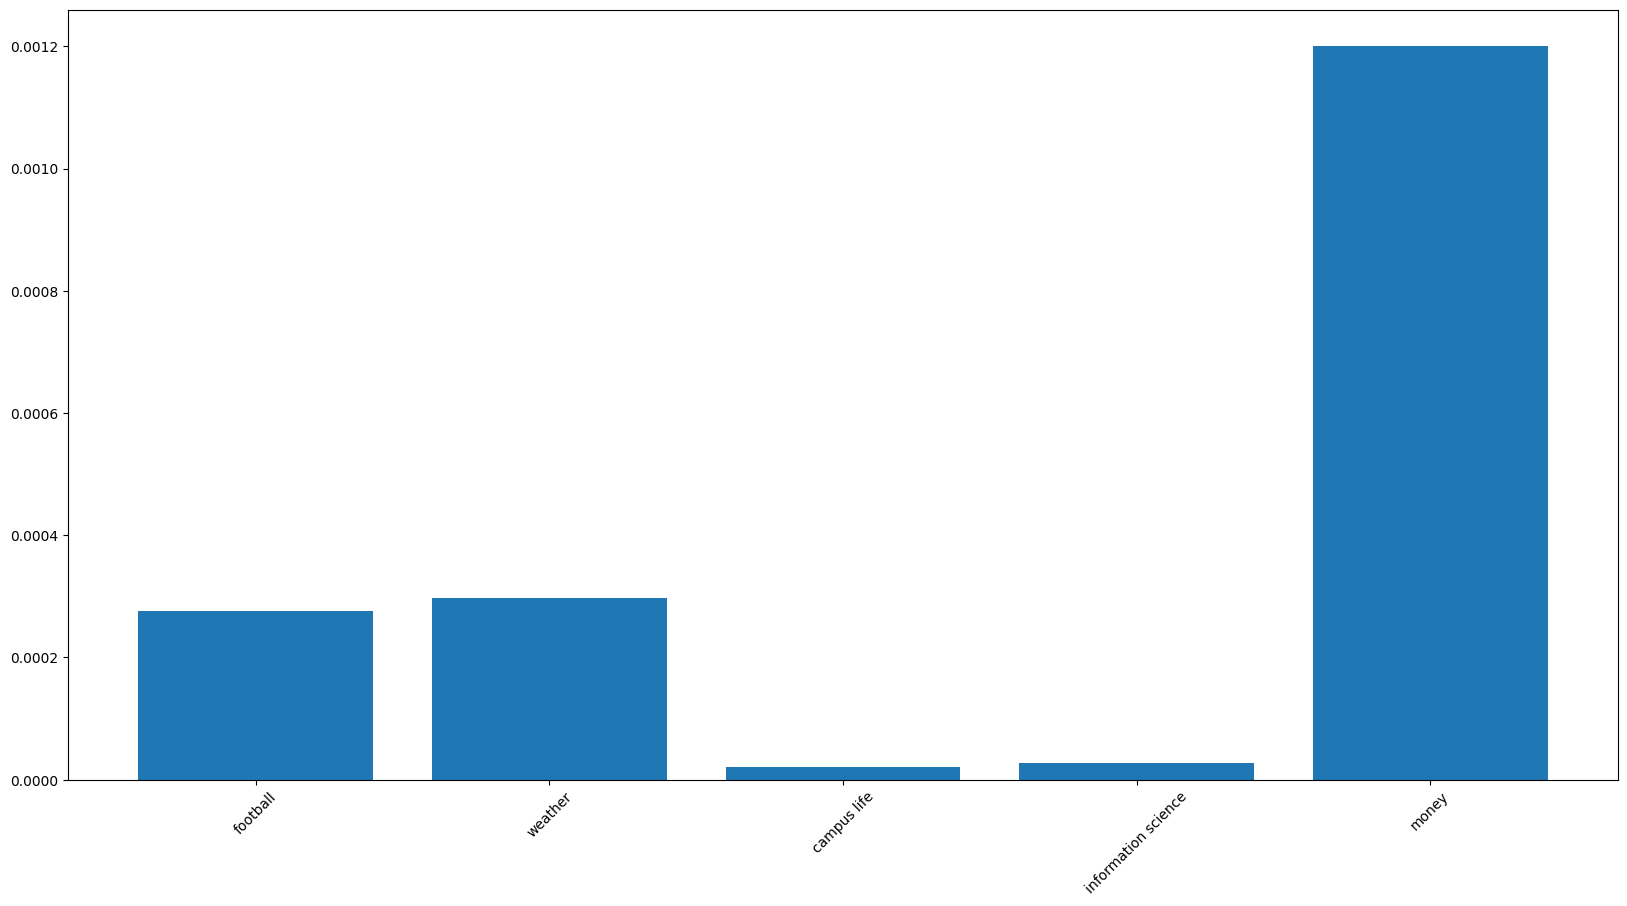

In [30]:
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [32]:
uiuc=pd.read_csv("uiuc.csv")

In [33]:
uiuc

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1
...,...,...,...,...,...,...
4720,4720,2024-08-21 20:28:40,1,Im interested if you're still looking,Accomplished_Fix2409,0
4721,4721,2024-08-21 20:26:15,7,I went to one of the taylor nights. was quite ...,student176895,4
4722,4722,2024-08-21 20:21:54,10,"Hey, I’m so sorry to hear that’s happening. If...",OCCLUIUC,5
4723,4723,2024-08-21 20:21:54,10,"AFAIK, the “cleaning company” that UGroup empl...",perpetuallytired29,3


In [34]:
def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [35]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
uiuc['cleaned_text'] = uiuc['text'].apply(clean)

In [36]:
#we can see the first comment after cleaning vs before
uiuc["cleaned_text"][0]

'have the same professor and in lecture he did say we were gonna have to learn some of the stuff ourself i would recommend using online resources such as pauls online math notes and professor leonard on youtube personally ive been learning the material from those sources before going to lecture'

In [37]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(uiuc['cleaned_text'])

In [38]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<4725x10109 sparse matrix of type '<class 'numpy.int64'>'
	with 98566 stored elements in Compressed Sparse Row format>

In [39]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aaa,aaaaah,aaabb,ab,abandoned,abcc,abide,abilities,ability,...,zombie,zone,zones,zoo,zoom,zoomed,봉사를,세계로,숭실,진리와
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the                                                                                                       4613
to                                                                                                        3629
and                                                                                                       2973
you                                                                                                       2551
of                                                                                                        1854
                                                                                                          ... 
httpswwwwciacomnewsraresquirrelmemorializedonuoficampus                                                      1
httpswwwurbanaillinoisussitesdefaultfilesattachmentslandlordtenantpdf                                        1
httpswwwuoficreditunionorgcreditcreditcardshttpswwwuoficreditunionorgcreditcreditcards                       1
h

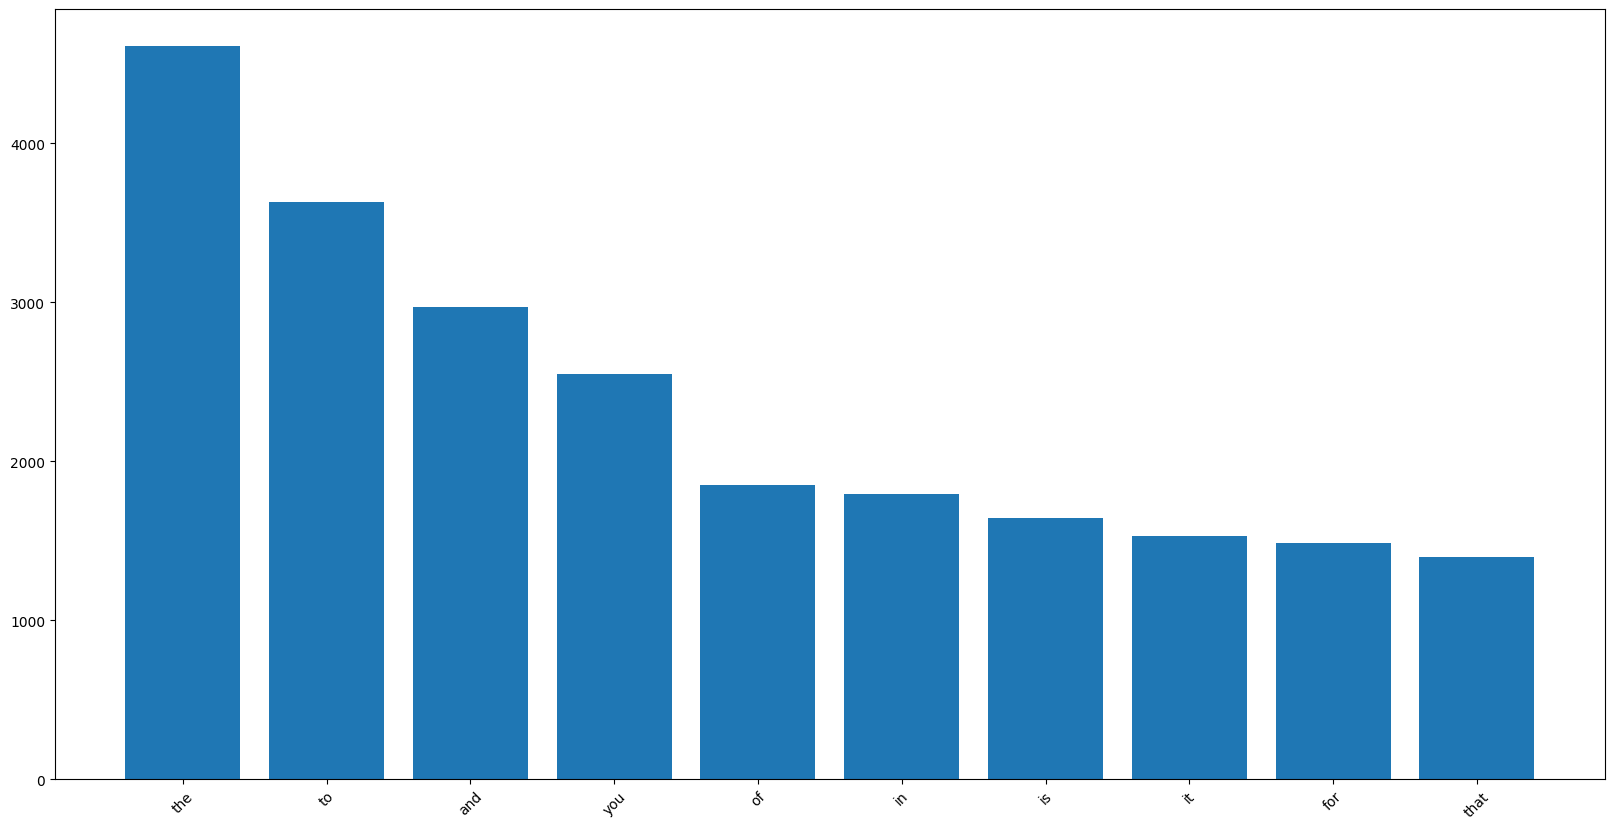

In [41]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()